# Reading data

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

train=pd.read_csv('train.csv',sep=',')
test=pd.read_csv('test.csv',sep=',')

## Some review about data

In [2]:
print(train.shape)
print("----------------------------")
print(train.columns)

print()
print(test.shape)
print("----------------------------")
print(test.columns)

(891, 12)
----------------------------
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

(418, 11)
----------------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S


As we can see, test.csv does not have Survived label on it. So we will work with only train part of dataset.

## Understanding features

In [4]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nakid, Miss. Maria (""Mary"")",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


PassengerId : integer
Pclass : integer
Name : string
Sex : binary
Age : float
SibSp : integer
Parch : integer
Ticket : string
Fare : Double
Cabin : String
Embarked : String

# 1) Pclass

In [5]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
print("Numbers of passengers")
pclass1 = train[train["Pclass"] == 1].shape[0]
print("Pclass 1:",pclass1)
pclass2 = train[train["Pclass"] == 2].shape[0]
print("Pclass 2:",pclass2)
pclass3 = train[train["Pclass"] == 3].shape[0]
print("Pclass 3:",pclass3)

Numbers of passengers
Pclass 1: 216
Pclass 2: 184
Pclass 3: 491


Text(0.5,1,'Survival rate by Class')

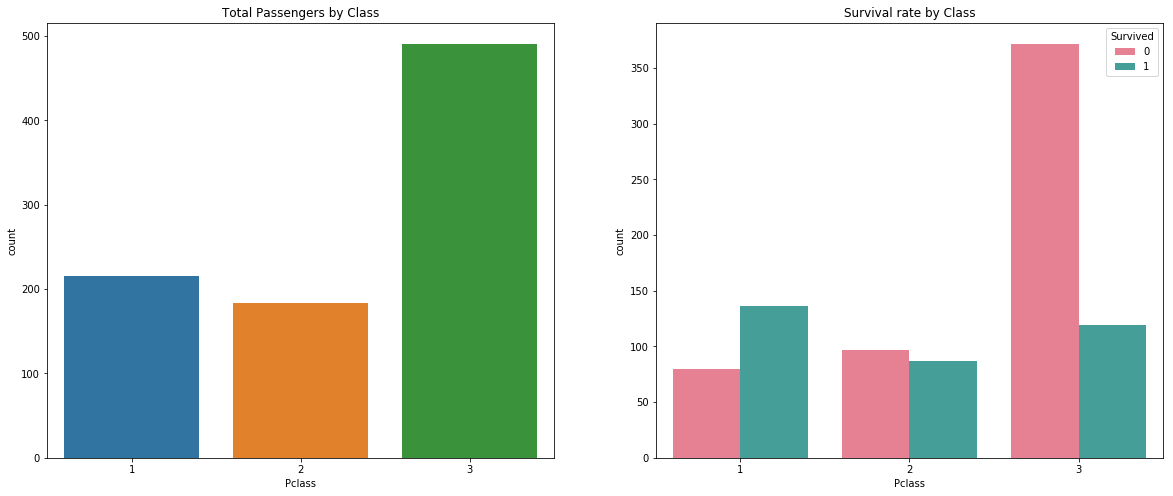

In [7]:
#plt.figure(figsize=(15,10))
#colors = train["Survived"]
#ncolors = []
#for sample in colors:
#    if sample==0:
#        ncolors.append('red')
#    else:
#        ncolors.append('blue')
#plt.scatter(train["PassengerId"], train["Pclass"], c=ncolors)
#plt.ylabel("Pclass")
#plt.xlabel("PassengerId")
#plt.show()
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('Pclass',data=train,ax=ax[0])
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by Class')
ax[1].set_title('Survival rate by Class')

# 2) Name

In [8]:
train["Name"].sample(5)

294                   Mineff, Mr. Ivan
649    Stanley, Miss. Amy Zillah Elsie
258                   Ward, Miss. Anna
270              Cairns, Mr. Alexander
325           Young, Miss. Marie Grice
Name: Name, dtype: object

We can only extract titles from names.

# 3) Title (Created by me)

In [9]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [10]:
for dataset in combine:
    dataset.replace(["Sir","Lady","Countess"],"Royal",inplace = True)
    dataset.replace("Mme","Miss",inplace = True)
    dataset.replace("Mlle","Miss",inplace = True)
    dataset.replace("Mrs","Miss",inplace = True)
    dataset.replace(["Capt","Col","Don","Dr","Jonkheer","Major","Rev"],"Rare",inplace=True)

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.738710
2,Mr,0.156673
3,Ms,1.000000
4,Rare,0.250000
5,Royal,1.000000


In [11]:
print("Numbers of titles")
master = train[train["Title"] == 'Master'].shape[0]
print("Master:",master)
miss = train[train["Title"] == "Miss"].shape[0]
print("Master:",miss)
mr = train[train["Title"] == "Mr"].shape[0]
print("Mr:",mr)
ms = train[train["Title"] == "Ms"].shape[0]
print("Ms:",ms)
rare = train[train["Title"] == "Rare"].shape[0]
print("Rare:",rare)
royal = train[train["Title"] == "Royal"].shape[0]
print("Royal:",royal)

Numbers of titles
Master: 40
Master: 310
Mr: 517
Ms: 1
Rare: 20
Royal: 3


Text(0.5,1,'Survival rate by Title')

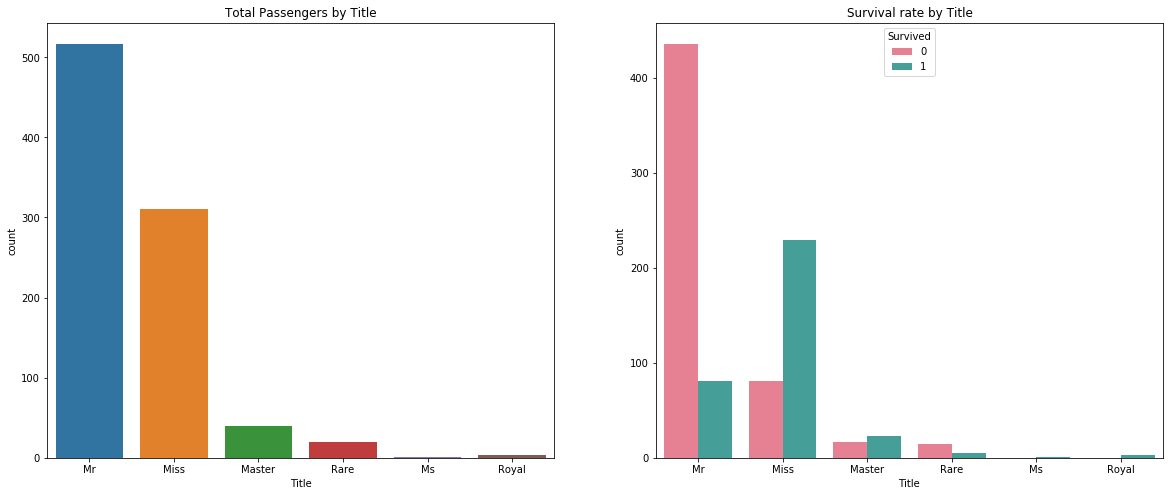

In [12]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('Title',data=train,ax=ax[0])
sns.countplot('Title',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by Title')
ax[1].set_title('Survival rate by Title')

As we can see from created feature, female and high socioeconomic passengers more like to survive. Now we will look at to sex feature.

# 4) Sex

In [13]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
print("Numbers of people")
female = train[train["Sex"] == 'female'].shape[0]
print("Female:",female)
male = train[train["Sex"] == "male"].shape[0]
print("Male:",male)

Numbers of people
Female: 314
Male: 577


Text(0.5,1,'Survival rate by Sex')

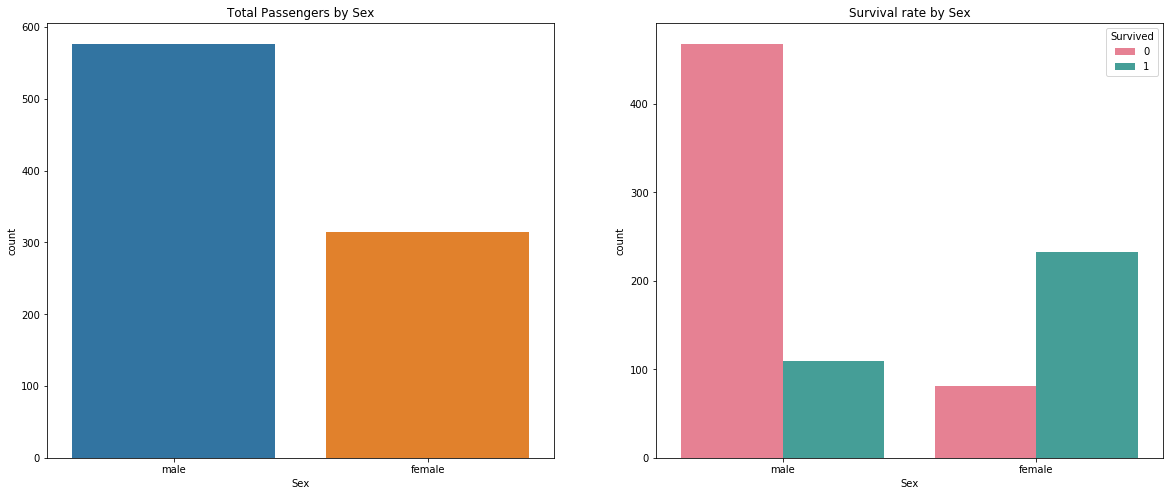

In [15]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('Sex',data=train,ax=ax[0])
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by Sex')
ax[1].set_title('Survival rate by Sex')

We can see that females are much more likely to survive.

# 4) Age

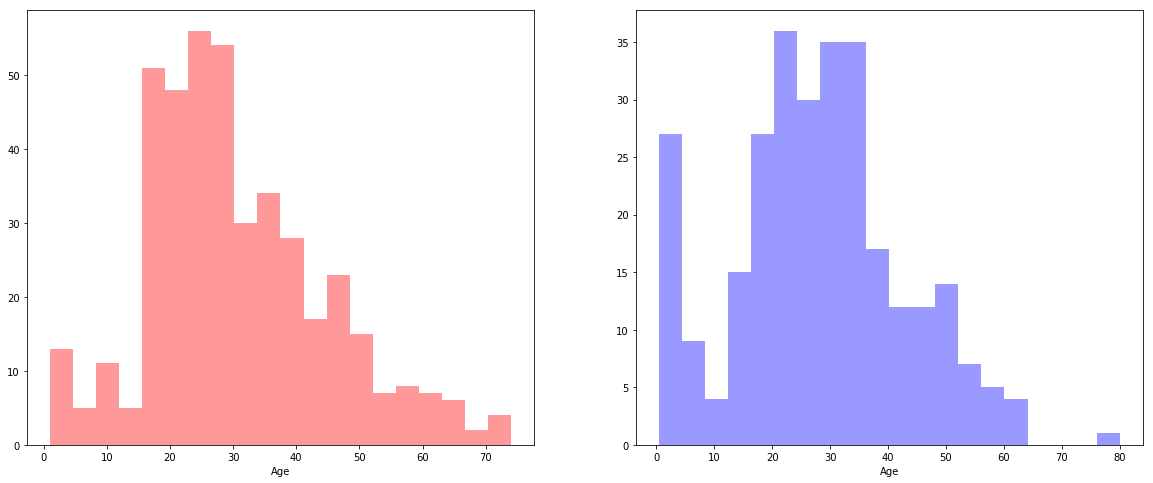

In [16]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(train[train['Survived']==0]['Age'].dropna(),ax=ax[0],kde=False,color='r',bins=20)
sns.distplot(train[train['Survived']==1]['Age'].dropna(),ax=ax[1],kde=False,color='b',bins=20)

In [17]:
train["Age"].isna().sum()

177

What i am trying to do is, make age groups of passengers.
Age groups will be:
    0-5 baby
    5-12 child
    12-17 teenage
    17-27 young adult
    27-60 adult
    60+ senior

# 5) Age Group (Created by me)

In [18]:
#sort the ages into logical categories
combine[0]["Age"].fillna(-0.5,inplace = True)
combine[1]["Age"].fillna(-0.5,inplace = True)
bins = [-1, 0, 5, 12, 17, 27, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenage', 'Young Adult', 'Adult', 'Senior']
combine[0]['Age Group'] = pd.cut(combine[0]["Age"], bins, labels = labels)
combine[1]['Age Group'] = pd.cut(combine[1]["Age"], bins, labels = labels)
train[['Age Group', 'Survived']].groupby(['Age Group'], as_index=False).mean()

,Age Group,Survived
0,Unknown,0.293785
1,Baby,0.704545
2,Child,0.360000
3,Teenage,0.477273
4,Young Adult,0.357143
5,Adult,0.405634
6,Senior,0.227273


Text(0.5,1,'Survival rate by Age Group')

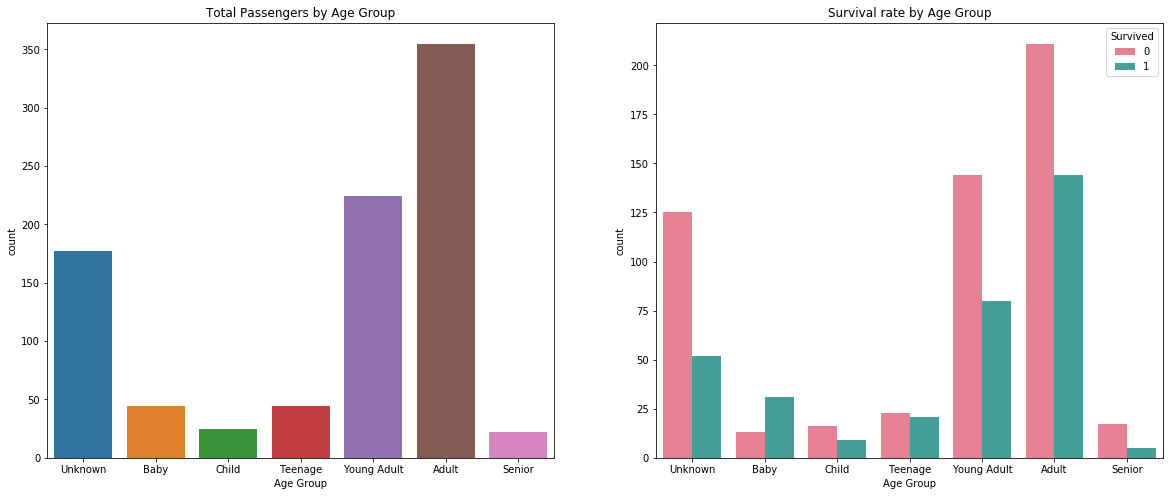

In [19]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('Age Group',data=train,ax=ax[0])
sns.countplot('Age Group',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by Age Group')
ax[1].set_title('Survival rate by Age Group')

Now we must fit Unknown age group to age groups. I will use Titles.

In [20]:
train[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Master,4.066750
1,Miss,22.908065
2,Mr,24.802708
3,Ms,28.000000
4,Rare,43.575000
5,Royal,43.333333


Master will be Baby, Miss will be Teenager, Mr will be Young Adult, Ms-Rare-Royal will be Adult.

In [21]:
mapping = {"Master":"Baby","Miss":"Teenage","Mr":"Young Adult","Ms":"Adult","Rare":"Adult","Royal":"Adult"}
print
for x in range(len(train["Age Group"])):
    if train["Age Group"][x] == "Unknown":
        train["Age Group"][x] = mapping[train["Title"][x]]

for x in range(len(test["Age Group"])):
    if test["Age Group"][x] == "Unknown":
        test["Age Group"][x] = mapping[test["Title"][x]]
train[['Age Group', 'Survived']].groupby(['Age Group'], as_index=False).mean()

,Age Group,Survived
0,Unknown,NaN
1,Baby,0.687500
2,Child,0.360000
3,Teenage,0.587629
4,Young Adult,0.274052
5,Adult,0.404494
6,Senior,0.227273


Text(0.5,1,'Survival rate by Age Group')

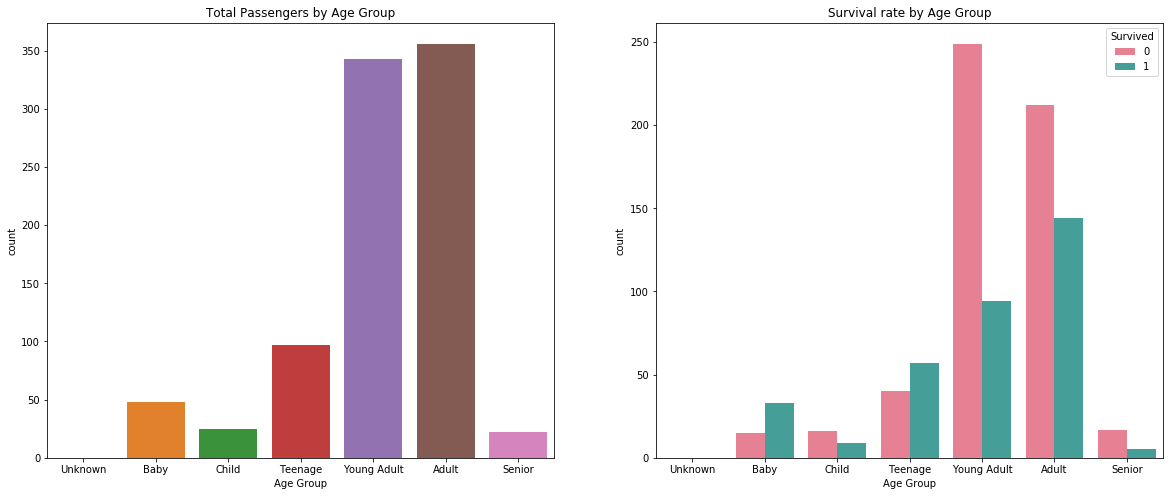

In [22]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('Age Group',data=train,ax=ax[0])
sns.countplot('Age Group',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by Age Group')
ax[1].set_title('Survival rate by Age Group')

# 6)SibSp

In [23]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5,1,'Survival rate by Age Sibsp')

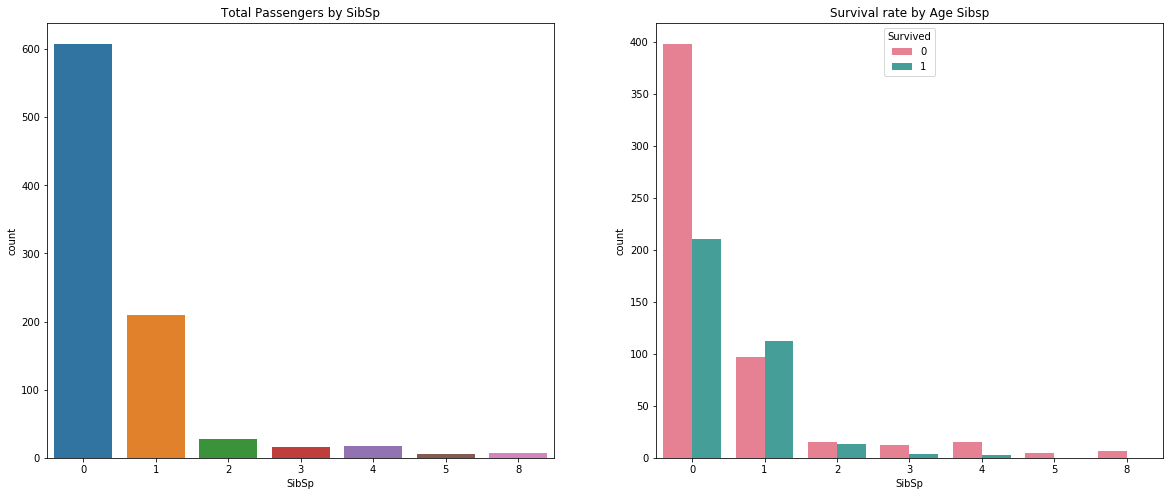

In [24]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('SibSp',data=train,ax=ax[0])
sns.countplot('SibSp',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by SibSp')
ax[1].set_title('Survival rate by Age Sibsp')

# 7)Parch

In [25]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Text(0.5,1,'Survival rate by Parch')

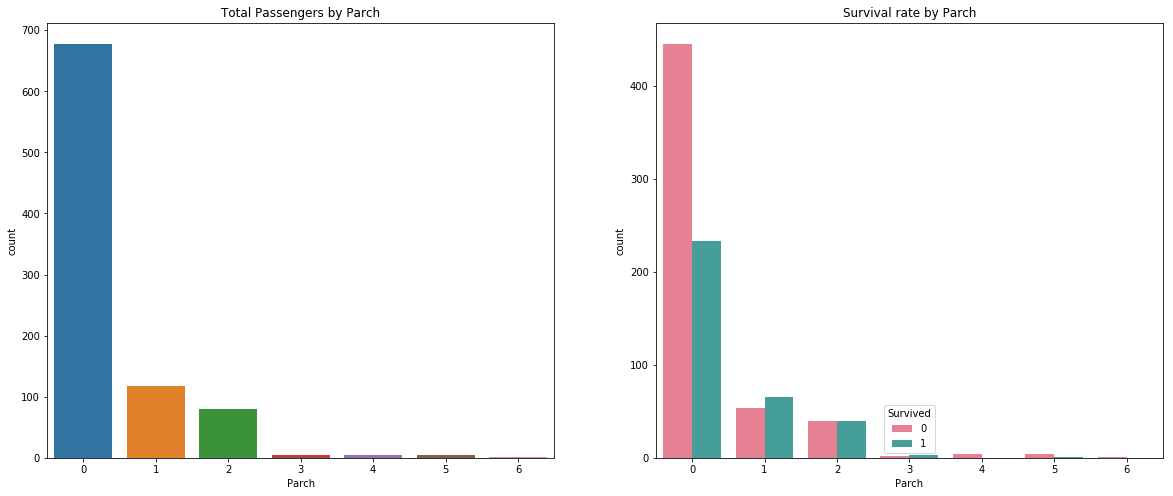

In [26]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('Parch',data=train,ax=ax[0])
sns.countplot('Parch',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by Parch')
ax[1].set_title('Survival rate by Parch')

#  8)Ticket	Fare

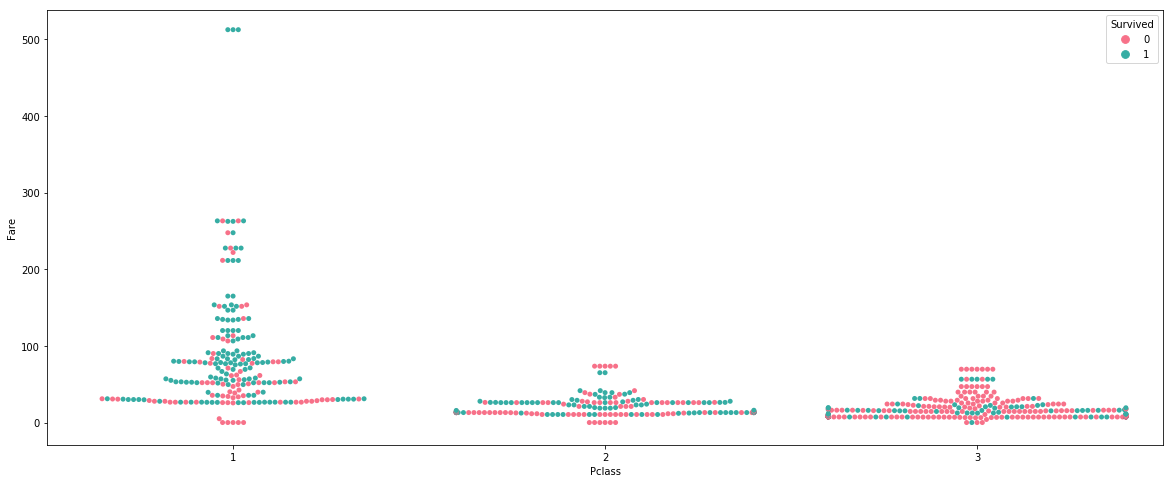

In [27]:
f,ax = plt.subplots(figsize=(20,8))
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train,palette='husl')

# 9)Cabin

In [28]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))
train[['CabinBool', 'Survived']].groupby(['CabinBool'], as_index=False).mean()

,CabinBool,Survived
0,0,0.299854
1,1,0.666667


In [53]:
print("Numbers of people")
cabintrue = train[train["CabinBool"] == 1].shape[0]
print("With cabin:",cabintrue)
cabinfalse = train[train["CabinBool"] == 0].shape[0]
print("Cabinless:",cabinfalse)

Numbers of people
With cabin: 204
Cabinless: 687


Text(0.5,1,'Survival rate by CabinBool')

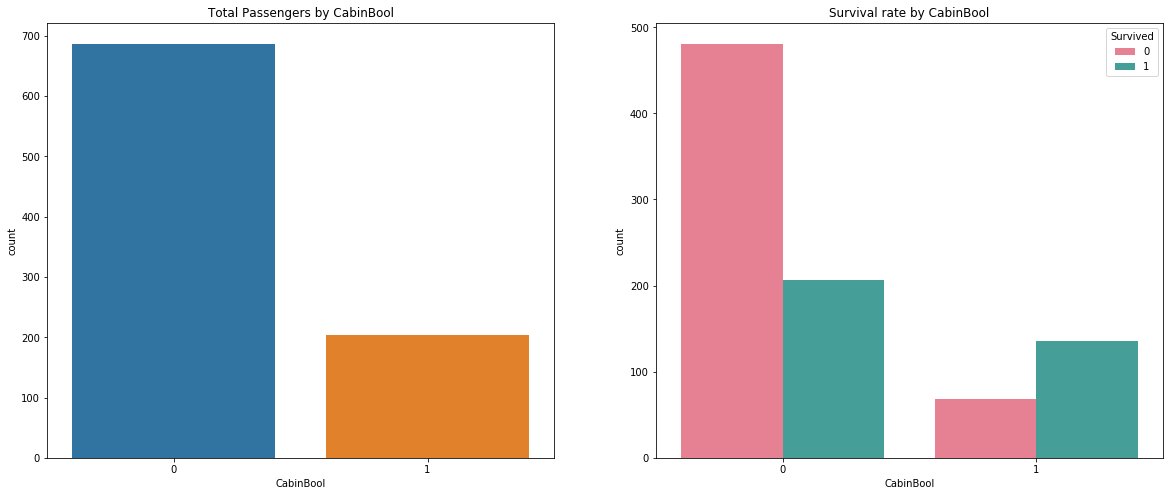

In [29]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('CabinBool',data=train,ax=ax[0])
sns.countplot('CabinBool',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by CabinBool')
ax[1].set_title('Survival rate by CabinBool')

# 10)Embarked

In [30]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [31]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})

In [32]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Text(0.5,1,'Survival rate by Embarked')

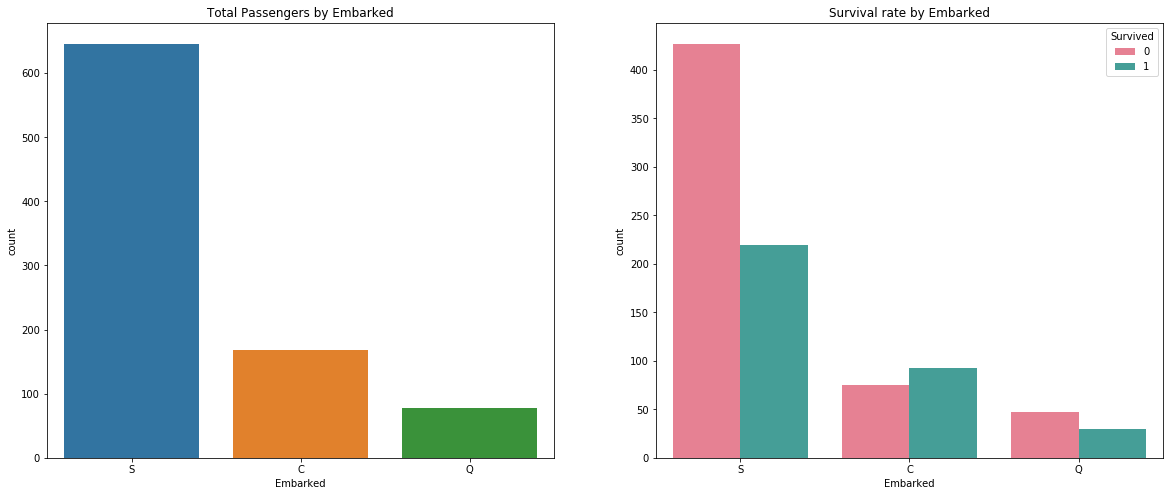

In [33]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot('Embarked',data=train,ax=ax[0])
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[0].set_title('Total Passengers by Embarked')
ax[1].set_title('Survival rate by Embarked')

# Cleaning data before score test

In [34]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Young Adult,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Miss,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Miss,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult,0


We will drop PassangerId,Survived,Name,Age,Ticket,Cabin

In [35]:
from sklearn.model_selection import train_test_split

train.drop(['Name','Age','Ticket','Cabin'], axis=1, inplace=True)

In [36]:
title_mapping = {"Mr": 1, "Miss": 2, "Ms": 3, "Master": 4, "Royal": 5, "Rare": 6}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age Group,CabinBool
0,1,0,3,male,1,0,7.2500,S,1,Young Adult,0
1,2,1,1,female,1,0,71.2833,C,2,Adult,1
2,3,1,3,female,0,0,7.9250,S,2,Young Adult,0
3,4,1,1,female,1,0,53.1000,S,2,Adult,1
4,5,0,3,male,0,0,8.0500,S,1,Adult,0


In [37]:
age_mapping = { "Unknown":0, "Baby": 1, "Child": 2, "Teenage": 3, "Young Adult": 4, "Adult": 5, "Senior": 6}
train['Age Group'] = train['Age Group'].map(age_mapping)
test['Age Group'] = test['Age Group'].map(age_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age Group,CabinBool
0,1,0,3,male,1,0,7.2500,S,1,4,0
1,2,1,1,female,1,0,71.2833,C,2,5,1
2,3,1,3,female,0,0,7.9250,S,2,4,0
3,4,1,1,female,1,0,53.1000,S,2,5,1
4,5,0,3,male,0,0,8.0500,S,1,5,0


In [38]:
sex_mapping = {"male": 1, "female": 2}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age Group,CabinBool
0,1,0,3,1,1,0,7.2500,S,1,4,0
1,2,1,1,2,1,0,71.2833,C,2,5,1
2,3,1,3,2,0,0,7.9250,S,2,4,0
3,4,1,1,2,1,0,53.1000,S,2,5,1
4,5,0,3,1,0,0,8.0500,S,1,5,0


In [39]:
embarked_mapping = {"S": 1, "C": 2, "Q":3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age Group,CabinBool
0,1,0,3,1,1,0,7.2500,1,1,4,0
1,2,1,1,2,1,0,71.2833,2,2,5,1
2,3,1,3,2,0,0,7.9250,1,2,4,0
3,4,1,1,2,1,0,53.1000,1,2,5,1
4,5,0,3,1,0,0,8.0500,1,1,5,0


In [40]:
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)
x_val.isna().sum()

Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
Age Group    0
CabinBool    0
dtype: int64

# Accuricies

In [41]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

79.19


In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

81.22


In [43]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

77.16


In [44]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.68


In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.7


In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.26


In [48]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

75.63


In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian,acc_linear_svc, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.26
2,Logistic Regression,81.22
6,Decision Tree,79.70
4,Naive Bayes,79.19
5,Linear SVC,78.68
0,Support Vector Machines,77.16
1,KNN,75.63
